#### Imports

In [1]:
import sys
sys.path.append('..')

## Data Quality
### Read Data

In [2]:
import pandas as pd

df = pd.read_csv('../data/house_sales.csv')
print(df.shape)
df.head()

(18448, 16)


,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639
2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503


### Missing Values

In [3]:
print('Found %d rows with missing values.' % df[df.isnull().any(axis=1)].shape[0])

Found 0 rows with missing values.


If the data set contained missing values, we would need to take care of them before making classifications.

The strategy would depend on the frequency and expected impact of the missing information. Faulty rows or columns could be entirely discarded or have their gaps completed with a reasonable value, like the feature's mean.

As the set is 100% complete, these actions are not necessary.

### Duplicated rows

In [4]:
df[df.duplicated(keep=False)].head()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
3363,550000,4,1.75,2410,8447,2.0,0,4,350,1936,1980,98074,47.649901,-122.088260,2520,14789
3364,550000,4,1.75,2410,8447,2.0,0,4,350,1936,1980,98074,47.649901,-122.088260,2520,14789
12746,585000,3,2.50,2290,5089,2.0,0,3,0,2001,0,98006,47.544285,-122.171537,2290,7984
12747,585000,3,2.50,2290,5089,2.0,0,3,0,2001,0,98006,47.544285,-122.171537,2290,7984
17129,555000,3,2.50,1940,3211,2.0,0,3,0,2009,0,98027,47.564378,-122.093255,1880,3078


There are some duplicated rows in our data set, we should keep the first occurrence and drop the rest.

In [5]:
size_0 = df.shape[0]
df.drop_duplicates(inplace=True)

print('Dropped %d duplicates.' % (size_0 - df.shape[0]))

Dropped 3 duplicates.


## Price Distribution

Now let us take a look at the distribution of our target variable.

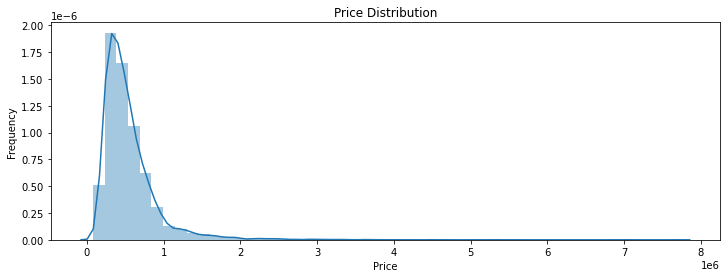

In [6]:
from src.visualization.visualize import plot_price_dist

plot_price_dist(df)

Most prices are between 250k and 600k, with a reasonable number of occurrences above that and below 2kk.

### Data Analisys

To understand the data and check for any abnormalities, in the following notebooks we explore each feature's relation to the price tag.